# Machine Learning: Training and evaluating a Regression model: An example
---
## Contents
1. Introduction
2. Setup
   1. Import required Python modules
   2. Load the dataset into a Pandas dataframe
3. Explore the dataset
4. Prepare the dataset
   1. Separte the dataset into `X` and `y` sets
   2. Apply required data engineering (one-hot encoding)
   3. Split the data in training and test datasets
5. Train the `linear regression` model
6. Evaluate the model
7. Assignment
---
## Introduction
This notebook provides a an example of training and evaluating a Regression model

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. 

This is a publicly available dataset from Kaggle: https://www.kaggle.com/datasets/farhanmd29/50-startups

Our ML training objective is to predict the amount of profit (this is the dependent, 'y' variable), based on the independent variables (X), R&D spending, Administration Spending, Marketing Spending and the location (state) of the business.


---
## Setup
Import the Python modules that we need for the model training and evaluation process.

The following set is also fairly typical for scikit-learn statistical model training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

Load the dataset that we are going to use for training, testing. 

This dataset noted above (from Kaggle), with information about 50 startups, has been downloaded to a local directory, `data` in this case.

The next step is read the CSV file into a Pandas dataframe so that we can easily explore the content of the dataset and get the dataset ready for model training.

The dataframe `head` function displays the first few rows of the dataframe

In [2]:
startups_df = pd.read_csv('data/50_Startups.csv')
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


---
## Explore the dataset 


Print a concise summary of a DataFrame.
The `info` method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [3]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Take a look a the statistics of the numerical fields

In [4]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Take a look at the shape of the dataset (rows, columns)

In [5]:
startups_df.shape

(50, 5)

---
## Prepare the dataset for training

1. Separate the data in the `independent variables`, aka `X`, aka the `observations`, and the `dependent variable`, aka `y`, aka the target `label`
2. Apply `feature engineering`. In this example, this is limited to `one-hot encoding` to the State variable.
3. Check the `cross-correlation` of the `independent variables`
4. Split the data into `training` and `test` datasets


In [6]:
X = startups_df.iloc[:, :-1]    # All but the last column are the observations (aka independent varibles)
y = startups_df.iloc[:, -1]     # The last column is the dependent variable, that we want to predict
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


Categorical data can not be used directly for regression and needs to be transformed into numeric data. The solution is to use dummy variables. We create dummy variables for regression analysis that take on one of two values: zero or one.

In [7]:
# create an instance of one-hot-encoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(X[['State']]).toarray())
enc_df.columns = ['California', 'Florida', 'New York']
# merge with main df on key values
X = X.join(enc_df)
X.head()

,R&D Spend,Administration,Marketing Spend,State,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,0.0,1.0,0.0


At this point we drop the State variable from X. Variable of this datatype (string) cannot be in the dataset when it is given to the ML algorithm 

In [8]:
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


For many ML algorithms there is a requirement the independent variables are independent. That they are not dependent on each other. 
This can be explored by looking at the cross-correlation of the variables. 
It is expected that there will be moderate correlation of the one-hot-encoded variables, as these have identical values and are mutually exclusive. 
This is not an issue that we are concerned about for this example.
The following shows the correlations metrics as a table and as a heatmap.
The metrics show a high correlation between R&D Spend and Marketing Spend, however, we may reasonably assume that these two are not dependent on each other.

In [9]:
X.corr()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


<Axes: >

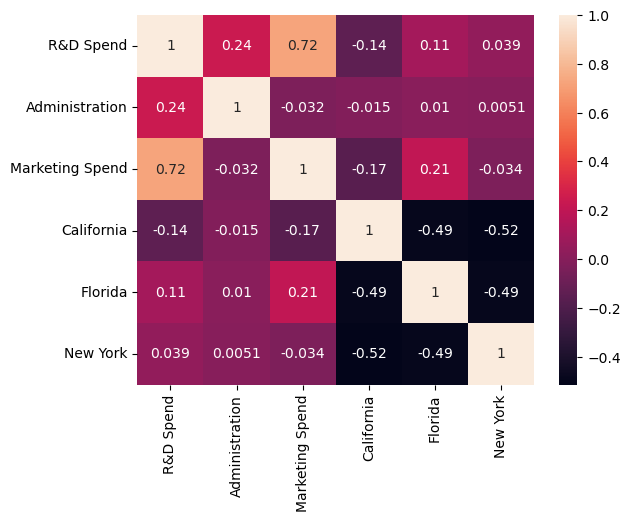

In [10]:
sns.heatmap(X.corr(), annot=True)

In [11]:
# SPLITTING DATA FOR train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---
## Train the model

1. Instantiate the model (in this case we'lll use Linear Regression)
2. Train the model, using the `fit` method

In [12]:
# FITTING THE MODEL/TRAIN
regressor = LinearRegression() # Instatiate the LinearRrgression model
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

---
## Evaluate the model

1. Run inference on the test data set and get the predictions
2. Compare the predictions to the target values for the test dataset

In [13]:
# Run the predictions
y_pred = regressor.predict(X_test)

In [14]:
# Assess the model with the R^2 metric
score = r2_score(y_test, y_pred)
print(f'R2 Model Score: {score:0.4}')

R2 Model Score: 0.9347


In [15]:
# Assess the model with the Root Mean Squared Error Model Error metric
score = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error Model Score: {score:0.6}')

Root Mean Squared Error Model Score: 9137.99


In [16]:
# Assess the model with the Mean Absolute Error metric
score = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error Model Score: : {score:0.6}')

Mean Absolute Error Model Score: : 7514.29


Compare the actual values and predicted values

In [17]:
# Calcluate the residuals
residuals = y_test - y_pred
print('Residuals: ', residuals)

Residuals:  28      267.178402
11    11677.122392
10    13674.211548
41     5822.731487
2     12512.907789
27   -11152.932302
38    13377.367903
31    -1308.173747
22    -3617.185330
4     -1733.125696
Name: Profit, dtype: float64


Text(0, 0.5, 'Predictions')

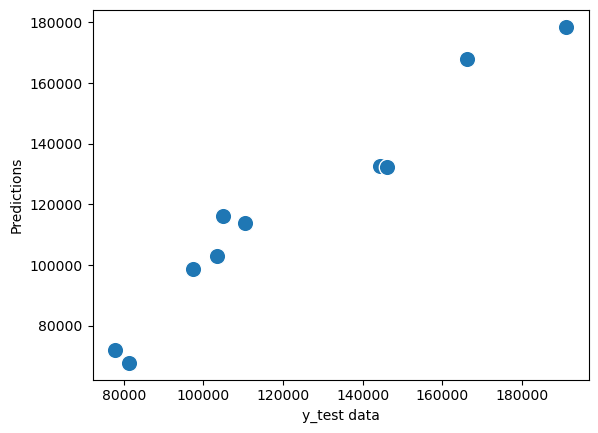

In [18]:
# Visualize the residuals (the differences between the labels and predicted values)
sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

### Evaluation Conclusion
Given the small size of the dataset both in terms of the number of observations and features, the model has a fairly high level of accuracy. 

With model results such as these, we might check in with the projects business lead to discuss our findings and next steps.

---
# Assignment

## Assignment Questions
Please submit the completed notebook with your answers for your assignment.

### Question 1

Changing the model algorithm from Linear Regression to an alternative (e.g., Ridge Regression, Random Forest Regression, Neural Network Regresssion) may improve ML performance.

*Answer in the cell below:* True/False? If true, in 3 or so sentences say why this may be the case.

Answer: True, it may improve the ML performance. However, as mentioned on the evaluation conclusion, the model has already a pretty good level of accuracy. R2 score of 0.93 and a mean absolute error of 7500, which could be neglectable depending on the project requirements. Random Forest Regression could be our next candidate as we have multiple independent variables.

### Question 2

Increasing the amount of training data (either by having more rows or more columns) may improve ML performance. 

*Answer in the cell below*: True/False? If true, in 3 or so sentences say why this may be the case.

Answer: True, adding more training data may help the model to identify some missed patterns/relationships in our independent variables. Doing so may help increase our R2 score and decrease our mean absolute error.

### Question 3

Automated Hyperparameter Optimization (HPO) can help with finding the best training hyperparameters for most algorithms.

*Answer in the cell below*: True/False? If true, in 3 or so sentences say why this may be the case.

Answer: True, Automated Hyperparameter Optimization is one of the most efficient method to tuning hyperparameters. Instead of trying to guess what is the best next optimization and running manually, HPO will conduct an automated guided search for us. It will save time and human effort/errors.

### Question 4

Almost no feature engineering was carried out on the dataset in this notebook. By carrying out more feature engineering we may be able to get better results. 

*Answer in the cell below*: Can you suggest one or two fields/attributes/columns that we might apply feature engineering on, and how the data in the field might be transformed.

Answer: There is a high correlation between R&D Spend and Marketing Spend. Dropping one of them should help improve the model. We could also try to visualize the data to identify some partterns we did not see before.

## One Step Further ... (purely optional)

For those of you who have the time and motivation to learn more ...

- Try implementing you ideas with respect to questions 1 and/or 4 and see the impact on the models performance
- Add your code in the cells below


### Overview

Based on my answers, I have decided to try to:
1. Review the data and apply any feature engineering I can think of
2. Run a different model alogrithm (i.e. Random Forest Regression)
3. Combine feature engineering from step 1. with Random Forest Regression from step 2. 

I will compare each models using the original `y_test` created. This ensures we are comparing fairly the performance of each models on the same test data.

### 1.a. Feature engineering

Visualize data based on previous examples presented by Toby in class. This might help us find a pattern we didn't catch previously.

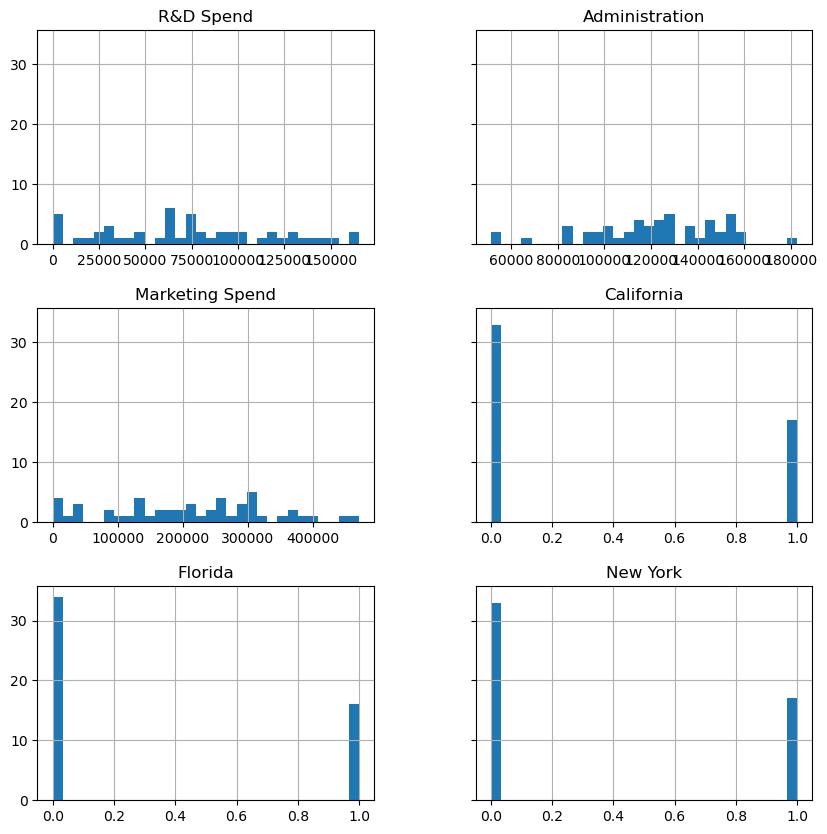

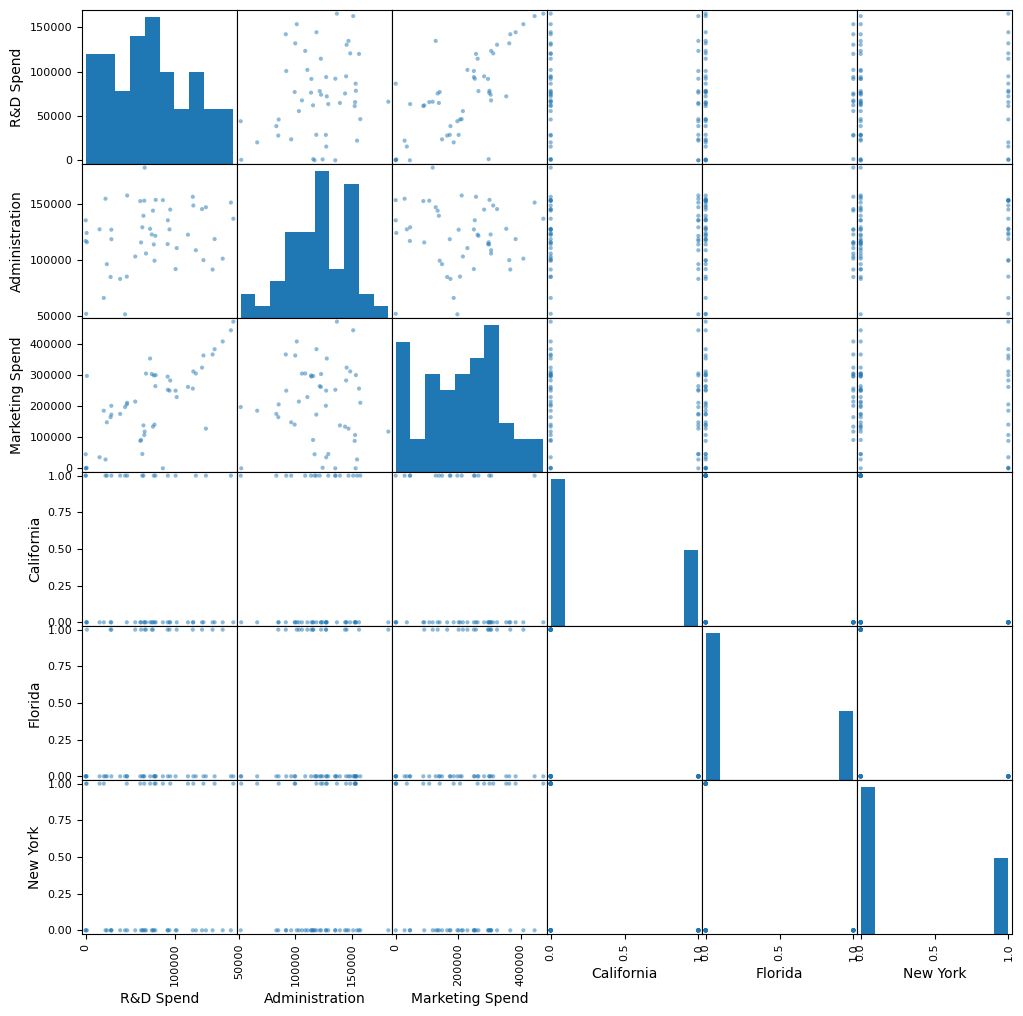

In [19]:
hist = X.hist(bins=30, sharey=True, figsize=(10, 10))
pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.show()

We decide to drop `Marketing Spend` as it has a high corelation with `R&D Spend` and rerun the model to see if this improves the model R2 score.

In [20]:
X_feature = X.drop('Marketing Spend', axis=1)

# Rerun the model
X_train_feature, X_test_feature, y_train_feature, _ = train_test_split(X_feature, y, test_size=0.2, random_state=0)
regressor.fit(X_train_feature, y_train_feature)

# Run the predictions
y_pred_feature = regressor.predict(X_test_feature)

R2 Model Score (Original): 0.9347
R2 Model Score (Feature): 0.9477


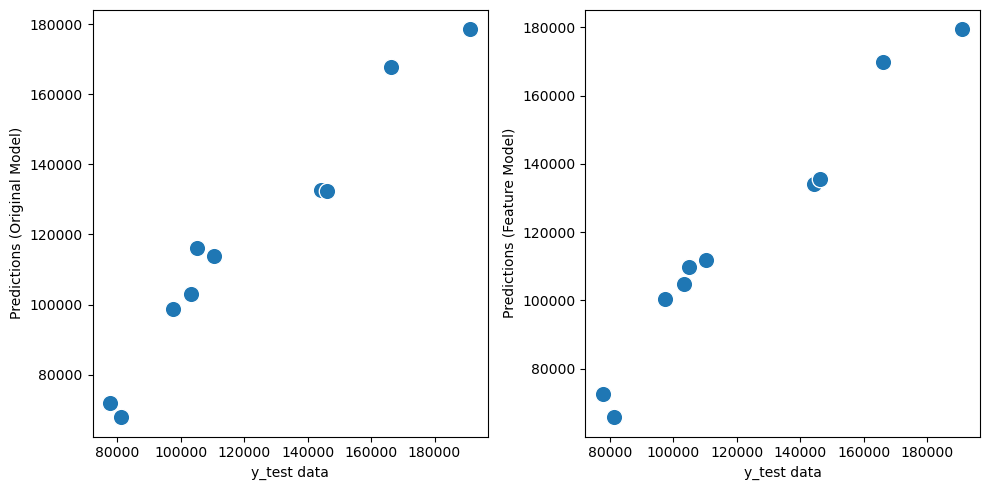

In [21]:
# Recalculate R2 Score the original model
score_original = r2_score(y_test, y_pred)
print(f'R2 Model Score (Original): {score_original:0.4}')

# Calculate R2 Score for the new model using initial `y_test`
score_feature = r2_score(y_test, y_pred_feature)
print(f'R2 Model Score (Feature): {score_feature:0.4}')

# Visualize the residuals of both models
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Original Model)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_feature, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Feature Model)')

plt.tight_layout()
plt.show()

### 1.b. Feature engineering results

We can see that feature engineering helped us increase our R2 Score by 1% (i.e. 0.9347 to 0.9477).
We can conclude that the above improved our model.

### 2.a. Forest model

Below I will use the original train data set with the Random Forest Regression model.

R2 Model Score (Original): 0.9347
R2 Model Score (Feature): 0.9477
R2 Model Score (Forest): 0.9691


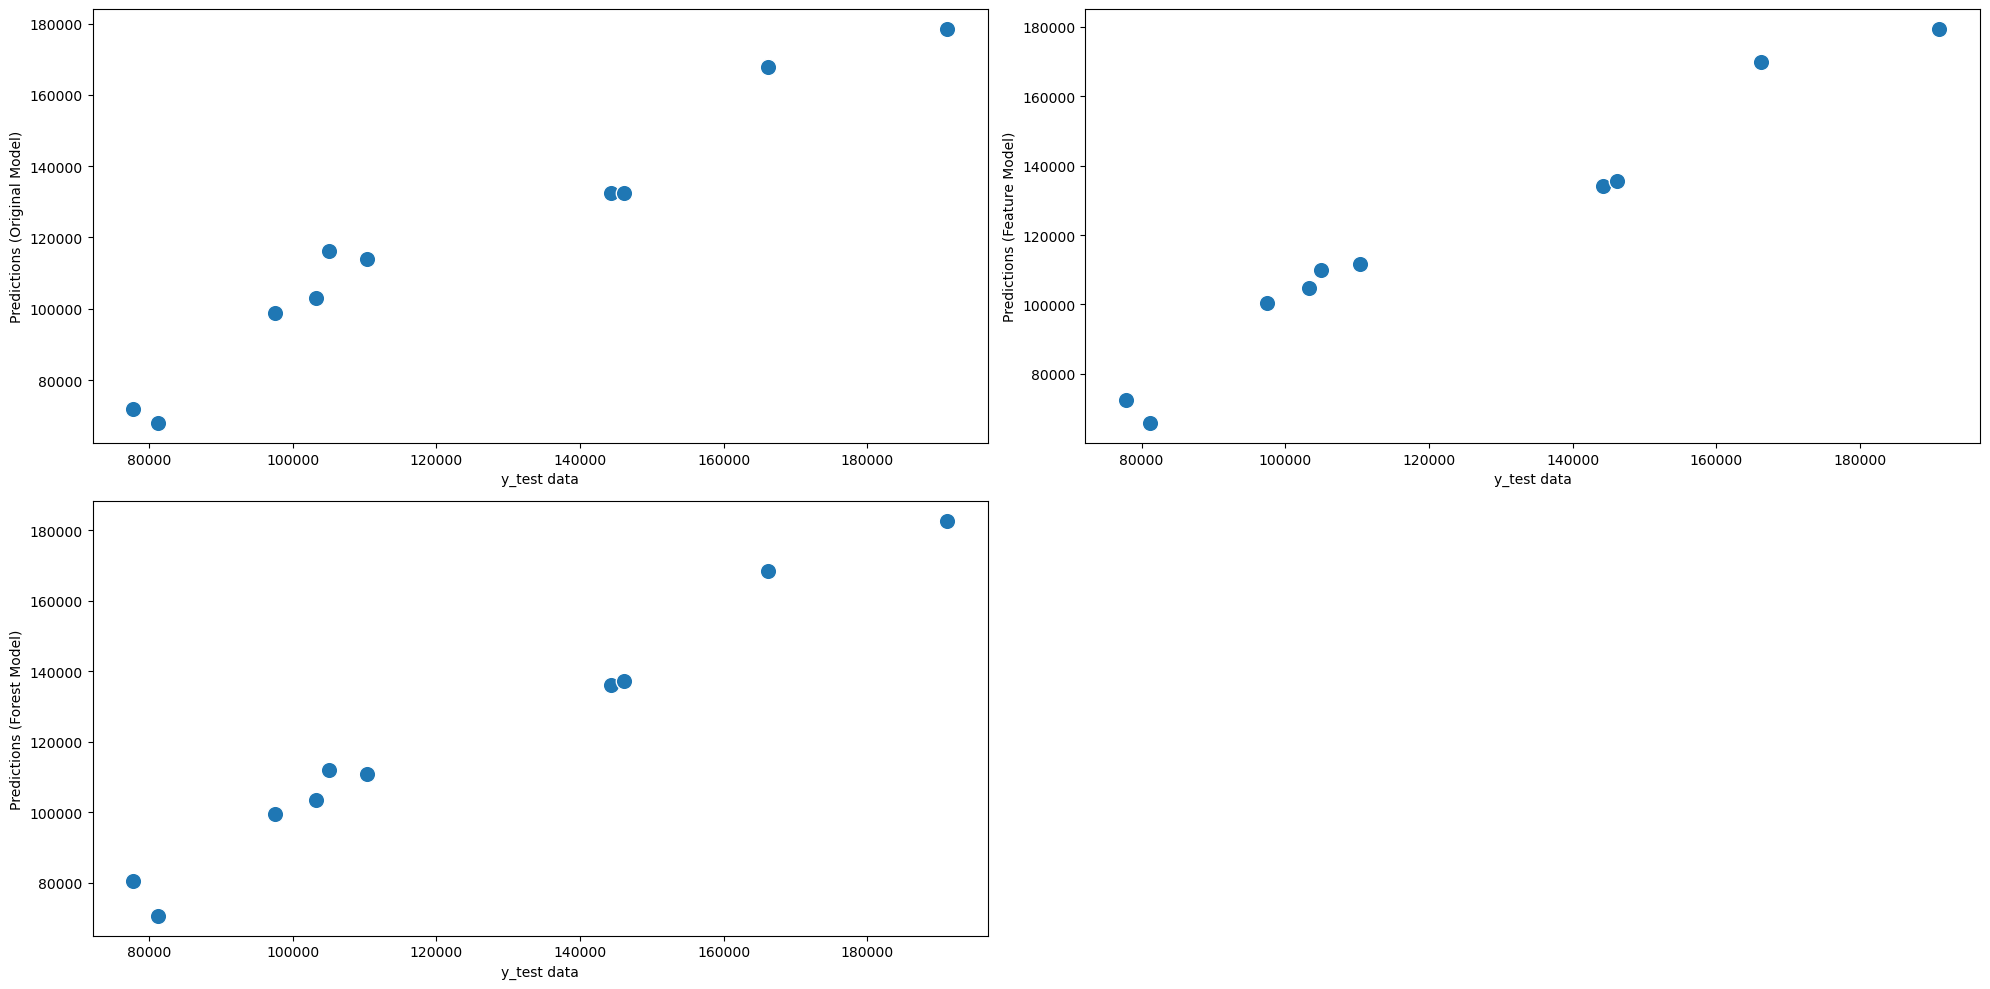

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = rf_model.predict(X_test)

print(f'R2 Model Score (Original): {score_original:0.4}')
print(f'R2 Model Score (Feature): {score_feature:0.4}')

# Calculate R2 Score for the new model using initial `y_test`
score_forest = r2_score(y_test, y_pred_forest)
print(f'R2 Model Score (Forest): {score_forest:0.4}')

# Visualize the residuals for the 3 models
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Original Model)')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_feature, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Feature Model)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_forest, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Forest Model)')

plt.tight_layout()
plt.show()

### 2.b. Forest model results

We can see that the random forest regression model helped us increase our R2 Score by 3% compared to our original model (i.e. 0.9347 to 0.9691).
We can conclude that the random forest model is more appropriate in our scenario than the linear regression.

### 3.a. Forest model and feature engineering

Based on the above results, let see if we can enhance our Random Forest Regression model by applying the feature engineering train data set (i.e. `X_train_feature`) from step 1.

R2 Model Score (Original): 0.9347
R2 Model Score (Feature): 0.9477
R2 Model Score (Forest): 0.9691
R2 Model Score (Forest and Feature): 0.955


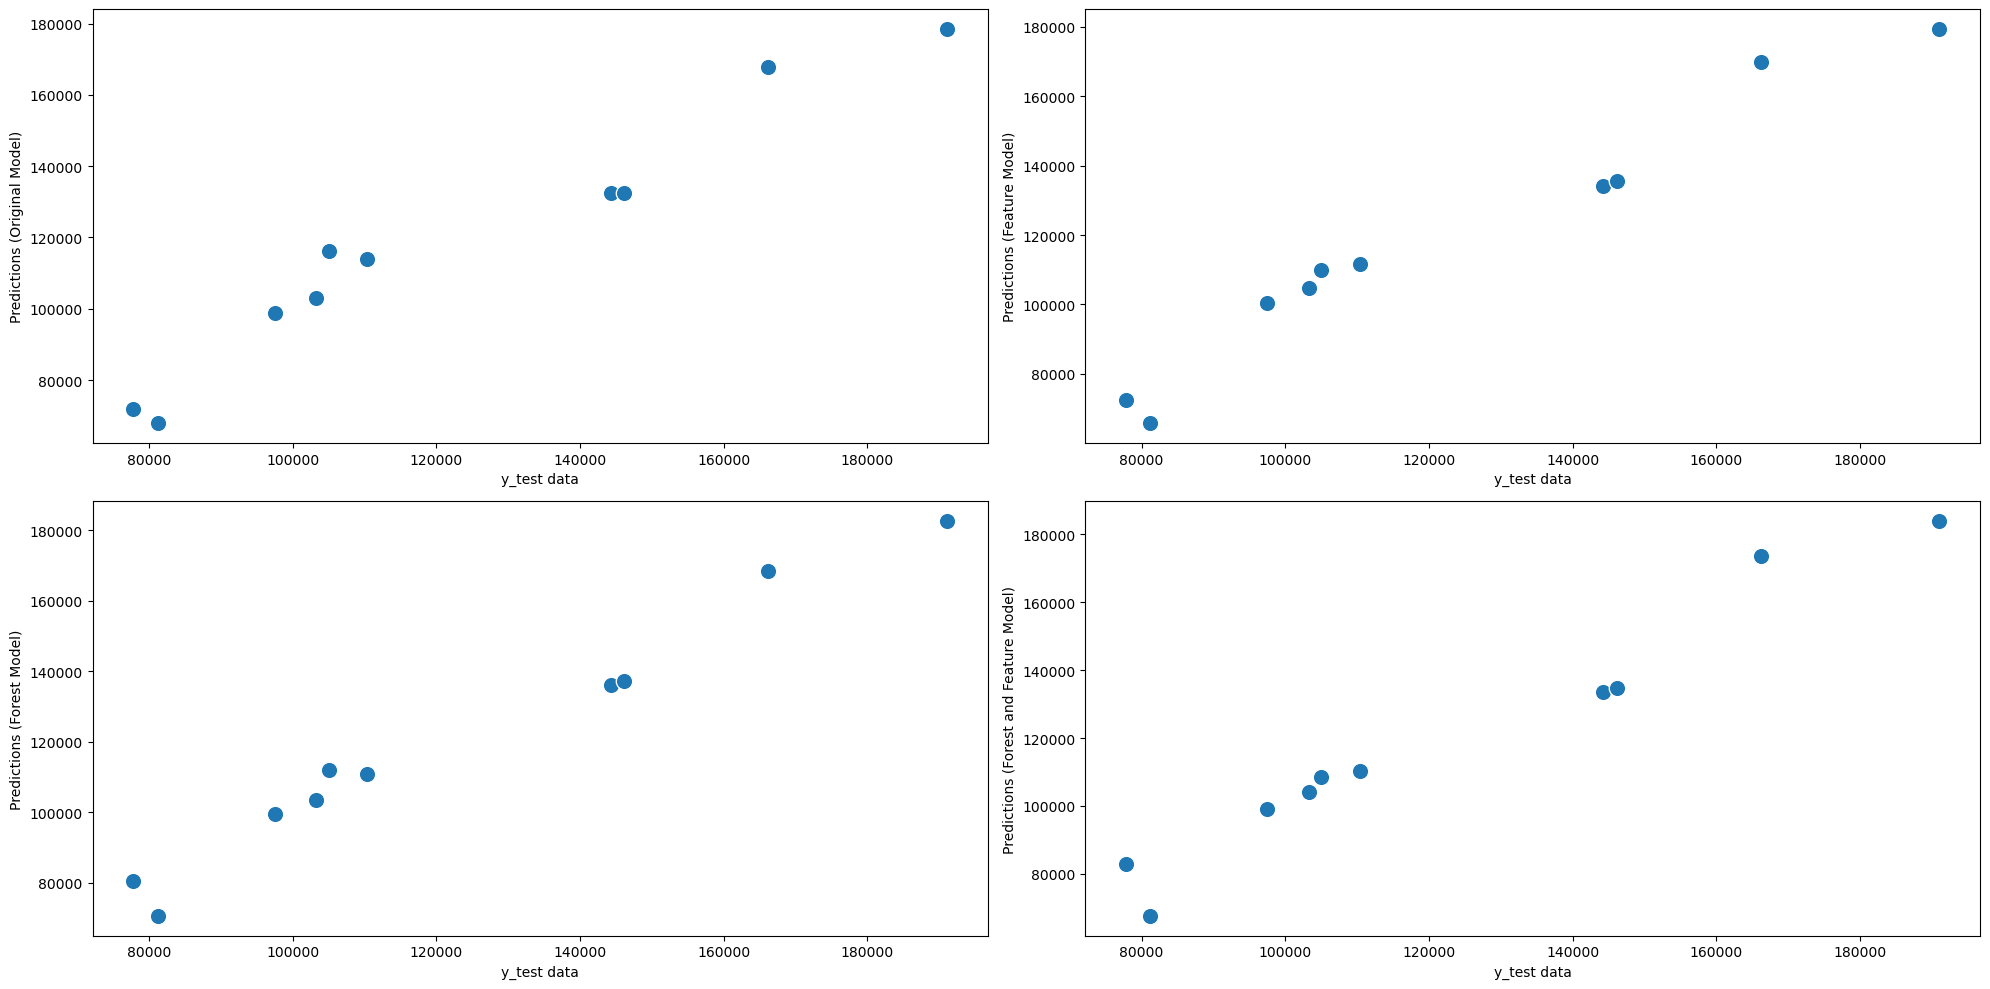

In [23]:
# Create and train the model using `X_train_feature`
rf_model_feature = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model_feature.fit(X_train_feature, y_train_feature)

# Make predictions
y_pred_forest_feature = rf_model_feature.predict(X_test_feature)

print(f'R2 Model Score (Original): {score_original:0.4}')
print(f'R2 Model Score (Feature): {score_feature:0.4}')
print(f'R2 Model Score (Forest): {score_forest:0.4}')

# Calculate R2 Score for the new model using initial `y_test`
score_forest_feature = r2_score(y_test, y_pred_forest_feature)
print(f'R2 Model Score (Forest and Feature): {score_forest_feature:0.4}')

# Visualize the residuals for the 4 models
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Original Model)')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_feature, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Feature Model)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_forest, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Forest Model)')

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_forest_feature, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions (Forest and Feature Model)')

plt.tight_layout()
plt.show()

### 3.b. Forest model and feature engineering results

To my suprise, we can see that the previous feature engineering does not improve our Random Forest Regression model. The combined approach decreased the model by 1% (i.e. 0.9691 to 0.955).

### 4. Conclusion and next steps

So far, we can conclude that the Random Forest Regresion model is the best model so far in our scenario with a R2 Model Score of 0.9691.
Next steps would be:
- Use more evaluation metrics than R2 to understand and fine tune the model
- Try some additional models
- Consider additional feature engineering techniques